# Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from src.config import Config

# Check top 12 countries

In [2]:
config = Config()
df = pd.read_csv(config.intermediate_data_file_name)
df

,year,country,population,gdp,primary_energy_consumption,temperature_change_from_co2,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2_including_luc,country_order
0,1800,Stany Zjednoczone,6000000.0,NaN,NaN,NaN,0.000,0.253,NaN,0.000,0.000,NaN,0.000,NaN,NaN,NaN,0
1,1801,Stany Zjednoczone,6113782.0,NaN,NaN,NaN,0.000,0.267,NaN,0.000,0.000,NaN,0.000,NaN,NaN,NaN,0
2,1802,Stany Zjednoczone,6229723.0,NaN,NaN,NaN,0.000,0.289,NaN,0.000,0.000,NaN,0.000,NaN,NaN,NaN,0
3,1803,Stany Zjednoczone,6347862.0,NaN,NaN,NaN,0.000,0.297,NaN,0.000,0.000,NaN,0.000,NaN,NaN,NaN,0
4,1804,Stany Zjednoczone,6468241.0,NaN,NaN,NaN,0.000,0.333,NaN,0.000,0.000,NaN,0.000,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8565,2019,Szwecja,10279122.0,4.670207e+11,625.819,0.003,1.357,8.115,68.989,0.536,1.780,5.166,28.523,0.522,28.155,45.999,44
8566,2020,Szwecja,10353680.0,4.568853e+11,600.279,0.003,1.272,6.649,61.302,0.445,1.442,5.528,26.363,0.532,24.600,42.231,44
8567,2021,Szwecja,10416136.0,4.814924e+11,633.680,0.003,1.259,6.992,67.796,0.009,1.901,6.410,27.953,0.519,29.162,45.044,44
8568,2022,Szwecja,10487333.0,4.942145e+11,621.694,0.003,1.259,6.914,68.447,0.012,1.550,6.823,25.997,1.742,30.973,44.298,44


### Charts co2 by year by top 12 countries

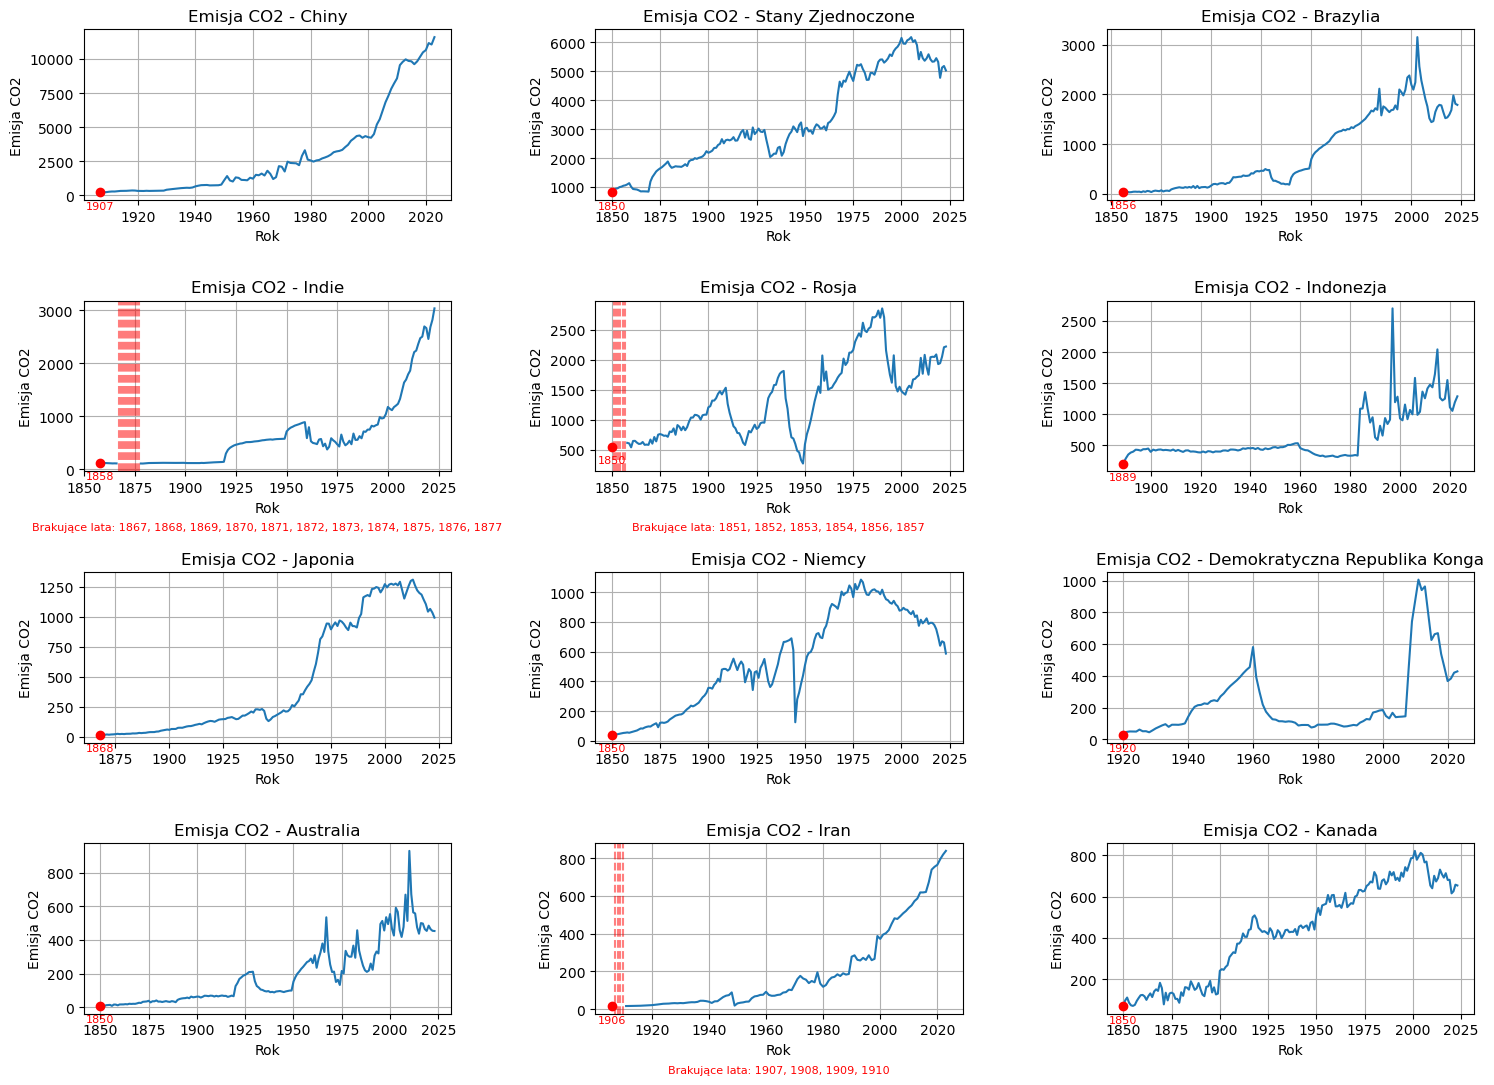

In [3]:
top_countries = df.groupby('country')['co2_including_luc'].max().nlargest(12).index

num_countries = len(top_countries)
num_cols = 3
num_rows = (num_countries - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 11), squeeze=False)

for i, country in enumerate(top_countries):
    country_df = df[df['country'] == country]
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]

    first_year_nonzero_co2 = country_df.loc[country_df['co2_including_luc'] > 0, 'year'].min()
    missing_years = country_df[country_df['co2_including_luc'].isnull() & (country_df['year'] > first_year_nonzero_co2)]['year']

    ax.plot(country_df['year'], country_df['co2_including_luc'])
    ax.set_title(f'Emisja CO2 - {country}')
    ax.set_xlabel('Rok')
    ax.set_ylabel('Emisja CO2')
    ax.grid(True)

    for year in missing_years:
        ax.axvline(x=year, color='r', linestyle='--', alpha=0.5)
    
    if not missing_years.empty:
        missing_text = f"Brakujące lata: {', '.join(map(str, missing_years))}"
        ax.text(0.5, -0.3, missing_text, ha='center', va='top', fontsize=8, color='red', transform=ax.transAxes)

    if not pd.isna(first_year_nonzero_co2):
        ax.scatter([first_year_nonzero_co2], [country_df.loc[country_df['year'] == first_year_nonzero_co2, 'co2_including_luc'].iloc[0]], color='red', zorder=5)
        ax.annotate(first_year_nonzero_co2, xy=(first_year_nonzero_co2, country_df.loc[country_df['year'] == first_year_nonzero_co2, 'co2_including_luc'].iloc[0]), xytext=(0, -12), 
                    textcoords='offset points', ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

In [4]:
# Cleaned data
top_countries = df.groupby('country')['co2_including_luc'].max().nlargest(12).index
top_countries_df = df[(df['country'].isin(top_countries))  & (df['year'] >= 1950)].reset_index(drop=True)
top_countries_df

,year,country,population,gdp,primary_energy_consumption,temperature_change_from_co2,cement_co2,coal_co2,consumption_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,other_industry_co2,trade_co2,co2_including_luc,country_order
0,1950,Stany Zjednoczone,154202683.0,2.320610e+12,NaN,0.088,20.125,1257.232,NaN,43.122,319.219,475.020,896.801,4.988,NaN,3016.505,0
1,1951,Stany Zjednoczone,156481322.0,2.497408e+12,NaN,0.089,22.041,1211.599,NaN,42.700,376.209,426.334,960.662,5.501,NaN,3045.046,0
2,1952,Stany Zjednoczone,158794225.0,2.590801e+12,NaN,0.090,22.256,1074.173,NaN,45.683,402.787,369.454,1000.967,5.355,NaN,2920.673,0
3,1953,Stany Zjednoczone,161168319.0,2.709833e+12,NaN,0.092,23.521,1065.955,NaN,43.620,423.342,339.162,1050.079,6.455,NaN,2952.133,0
4,1954,Stany Zjednoczone,163636304.0,2.691885e+12,NaN,0.093,24.131,913.446,NaN,38.952,444.000,348.944,1063.212,5.721,NaN,2838.407,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,2019,Iran,87051647.0,1.438755e+12,3263.971,0.009,35.303,4.847,653.124,25.963,429.315,19.014,239.919,NaN,-82.223,754.361,21
884,2020,Iran,87723446.0,1.446204e+12,3387.954,0.009,38.808,5.577,690.109,24.925,465.332,8.470,221.965,NaN,-66.497,765.076,21
885,2021,Iran,88455491.0,1.525523e+12,3322.058,0.009,37.419,5.181,696.318,32.496,476.040,14.884,228.620,NaN,-83.438,794.640,21
886,2022,Iran,89524247.0,1.572209e+12,3466.873,0.010,34.704,5.348,697.120,32.375,496.507,18.417,231.813,NaN,-103.626,819.163,21


In [5]:
# % of missing data for all cols
top_countries_df.isna().sum()/top_countries_df.shape[0]*100

year                            0.000000
country                         0.000000
population                      0.000000
gdp                             1.351351
primary_energy_consumption     24.436937
temperature_change_from_co2     0.000000
cement_co2                      0.000000
coal_co2                        0.000000
consumption_co2                59.121622
flaring_co2                     0.000000
gas_co2                         0.000000
land_use_change_co2             0.000000
oil_co2                         0.000000
other_industry_co2             61.486486
trade_co2                      59.121622
co2_including_luc               0.000000
country_order                   0.000000
dtype: float64

In [6]:
# Remove columns
top_countries_df = top_countries_df.drop(columns={'primary_energy_consumption', 'consumption_co2', 'other_industry_co2', 'trade_co2'})

In [7]:
# % of missing data for all cols
top_countries_df.isna().sum()/top_countries_df.shape[0]*100

year                           0.000000
country                        0.000000
population                     0.000000
gdp                            1.351351
temperature_change_from_co2    0.000000
cement_co2                     0.000000
coal_co2                       0.000000
flaring_co2                    0.000000
gas_co2                        0.000000
land_use_change_co2            0.000000
oil_co2                        0.000000
co2_including_luc              0.000000
country_order                  0.000000
dtype: float64

In [8]:
# Reorder columns
top_countries_df = top_countries_df.reindex(columns=['year', 'country', 'population', 'gdp', 'cement_co2', 
                                                     'coal_co2', 'flaring_co2', 'gas_co2', 'land_use_change_co2', 'oil_co2', 'cumulative_co2_including_luc', 'co2_including_luc'])
top_countries_df

,year,country,population,gdp,cement_co2,coal_co2,flaring_co2,gas_co2,land_use_change_co2,oil_co2,cumulative_co2_including_luc,co2_including_luc
0,1950,Stany Zjednoczone,154202683.0,2.320610e+12,20.125,1257.232,43.122,319.219,475.020,896.801,NaN,3016.505
1,1951,Stany Zjednoczone,156481322.0,2.497408e+12,22.041,1211.599,42.700,376.209,426.334,960.662,NaN,3045.046
2,1952,Stany Zjednoczone,158794225.0,2.590801e+12,22.256,1074.173,45.683,402.787,369.454,1000.967,NaN,2920.673
3,1953,Stany Zjednoczone,161168319.0,2.709833e+12,23.521,1065.955,43.620,423.342,339.162,1050.079,NaN,2952.133
4,1954,Stany Zjednoczone,163636304.0,2.691885e+12,24.131,913.446,38.952,444.000,348.944,1063.212,NaN,2838.407
...,...,...,...,...,...,...,...,...,...,...,...,...
883,2019,Iran,87051647.0,1.438755e+12,35.303,4.847,25.963,429.315,19.014,239.919,NaN,754.361
884,2020,Iran,87723446.0,1.446204e+12,38.808,5.577,24.925,465.332,8.470,221.965,NaN,765.076
885,2021,Iran,88455491.0,1.525523e+12,37.419,5.181,32.496,476.040,14.884,228.620,NaN,794.640
886,2022,Iran,89524247.0,1.572209e+12,34.704,5.348,32.375,496.507,18.417,231.813,NaN,819.163


In [9]:
# Save in csv
top_countries_df.to_csv(os.path.join(config.output_cleaned, 'data_cleaned_first_model.csv'), index=False)